# Project: Twitter Impact Prediction

Created on Friday, July 18, 07:10:2020

**Author:** Shivam Kolhe<br>
**Dataset:** Twitter Impact Prediction<br>
**File:** 1<br>
**Type:** Radrr Assessment<br>
**Minimum Test RMSE Achieved:** 0.57<br>
**Maximum R2 Achieved:** 0.988<br>
**Best Algorithm (Lowest RMSE):** Light Gradient Boosting<br>
**Best Balanced Algorithm:** Linear Regression<br>
**Variable With Highest Impact:** LIKES<br>

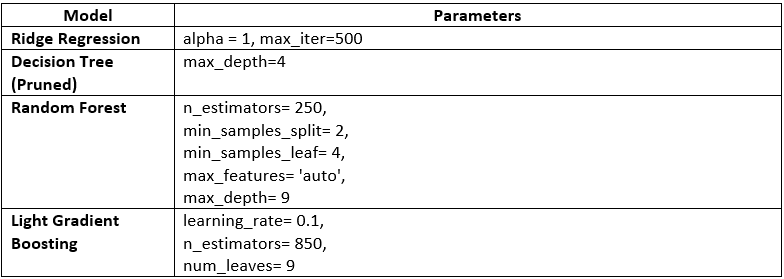

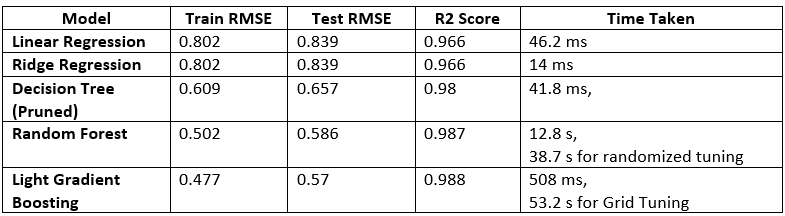

## Attribute Information
 
- **Post Content**          - The text in the tweet
- **Sentiment score**       - Ranges from -20 to +20 (0 - neutral)
- **Post Length**           - The length of the tweet
- **Hashtag Count**         - The number of hashtags used in the tweet
- **Content URL Count**     - The number of URLs mentioned in the tweet
- **Tweet Count**           - The total number of tweets posted by the author of the tweet
- **Followers Count**       - The number of followers of the author of the post
- **Listed Count**          - the number of lists the post author is a part of
- **Media Type**            - The media type of the post (Text, image, video)
- **Published Datetime**    - The published time of the tweet
- **Mentions Count**        - The number of user mentions in the tweet
- **Post Author Verified**  - 1 if author is a verified user
- **Likes**                 - Likes received for the tweet
- **Shares**                - Retweets received for the tweet
- **Comments**              - Number of comments for the twee


# Import Libraries

In [1]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Pandas' for data manipulation
import pandas as pd 

# 'Numpy' for advance mathematical operations
import numpy as np

# 'Matplotlib' and 'Seaborn' for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 'sklearn' for machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# 'rcParams' for setting the plot size 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# returns an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format


# Read Data

In [4]:
# read csv file 'train.csv'
df_twitter = pd.read_csv('twitter.csv')

# display the first 5 rows of the dataframe
df_twitter.head()

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.000000,17.000000,0.000000,0.000000,1660.000000,133.000000,0,TEXT,2021-01-28 12:17:24+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,27955,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.300000,84.000000,0.000000,1.000000,318924.000000,1428273.000000,5454,TEXT,2021-02-24 06:51:02+00:00,0.000000,1.000000,10.000000,1.000000,0.000000,110.000000
2,38151,7f224e66ad757e3066d45947881bcaab91f8e57f,SuperM’s album isn’t even out yet and there’s ...,0.000000,78.000000,0.000000,0.000000,39976.000000,1560.000000,0,TEXT,2020-09-15 01:16:32+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,13558,5acc220e7a337efafc4c847b7f74680ca2515890,மத்திய அரசின் நலத்திட்டங்களை மக்களுக்கு சென்று...,0.000000,284.000000,2.000000,0.000000,8045.000000,27191.000000,26,TEXT,2021-02-14 03:53:53+00:00,0.000000,1.000000,460.000000,219.000000,4.000000,6830.000000
4,17071,863abf834897a06afdc459788b34abeae6298f3a,【熊本県人吉市】球磨川氾濫後のくま川鉄道の線路被害状況 hamusoku.com/archi...,-20.000000,80.000000,0.000000,1.000000,210996.000000,2385.000000,0,IMAGE,2020-07-04 13:06:16+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
# check the shape of the dataframe
df_twitter.shape

(50000, 18)

In [6]:
# check the statistical summary of the dataframe
df_twitter.describe()

,Unnamed: 0,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,14193.578860,1.068916,154.692360,0.687520,0.480260,241425.662880,4648758.901500,10069.683200,0.113720,0.626480,3020.706300,966.773260,16.407920,40038.735600
std,10363.500433,10.436746,79.099411,1.346979,0.526019,1607467.189352,12545134.842385,28384.958681,0.512984,0.483743,8261.945400,3117.212706,543.669304,103075.779094
min,0.000000,-20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6017.000000,0.000000,94.000000,0.000000,0.000000,11237.750000,10539.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000
50%,12076.500000,0.000000,142.000000,0.000000,0.000000,52738.000000,355122.500000,555.500000,0.000000,1.000000,153.000000,42.000000,0.000000,2100.000000
75%,20650.250000,0.000000,215.000000,1.000000,1.000000,259501.500000,2809978.250000,6171.000000,0.000000,1.000000,1909.000000,559.000000,0.000000,27500.000000
max,43879.000000,20.000000,373.000000,21.000000,7.000000,50444081.000000,114440557.000000,568139.000000,12.000000,1.000000,90919.000000,79671.000000,66939.000000,997980.000000


In [7]:
# check the concise summary of a dataFrame
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            50000 non-null  int64  
 1   Id                    50000 non-null  object 
 2   Post Contet           50000 non-null  object 
 3   Sentiment score       50000 non-null  float64
 4   Post Length           50000 non-null  float64
 5   Hashtag count         50000 non-null  float64
 6   Content URL count     50000 non-null  float64
 7   Tweet count           50000 non-null  float64
 8   Followers count       50000 non-null  float64
 9   Listed Count          50000 non-null  int64  
 10  Media Type            50000 non-null  object 
 11  Published DateTime    50000 non-null  object 
 12  Mentions Count        50000 non-null  float64
 13  Post author verified  50000 non-null  float64
 14  Likes                 50000 non-null  float64
 15  Shares             

In [8]:
df_twitter['Post author verified'] = df_twitter['Post author verified'].astype('object')

## Check for useless features

In [9]:
df_twitter.drop(['Unnamed: 0', 'Id', 'Post Contet', 'Published DateTime'], axis = 1, inplace = True)

In [10]:
for col in df_twitter.columns:
    try:
        print("{} : \t\t{}".format(col, str(df_twitter[col].std())))
    except:
        pass

Sentiment score : 		10.436746107328421
Post Length : 		79.09941119861347
Hashtag count : 		1.3469790409097255
Content URL count : 		0.5260188839929745
Tweet count : 		1607467.1893518346
Followers count : 		12545134.842385259
Listed Count : 		28384.958681344953
Mentions Count : 		0.5129844292573731
Post author verified : 		0.4837432064120332
Likes : 		8261.945399530328
Shares : 		3117.2127064080614
Comments : 		543.6693036835637
Impact : 		103075.77909428222


We can see that the standard deviation of all the columns is greater than zero. Thus we there are no unnecessary columns.


# Data Preprocessing

### Deal With Null Values

In [11]:
# function to check the percentage of the null values
def ShowNullPercentage(data, sortType=False):
        Columns = list(data.columns)
        Percentage = []
        for val in data:
            Percentage.append((data[val].isnull().sum() / data.shape[0]) * 100)
        
        nulldf = {'Column':Columns, 'Percentage':Percentage}
        return(pd.DataFrame(nulldf).sort_values(['Percentage'], ascending=sortType).to_string())

In [12]:
# execute the function to check null percentage
print(ShowNullPercentage(df_twitter))

                  Column  Percentage
0        Sentiment score    0.000000
1            Post Length    0.000000
2          Hashtag count    0.000000
3      Content URL count    0.000000
4            Tweet count    0.000000
5        Followers count    0.000000
6           Listed Count    0.000000
7             Media Type    0.000000
8         Mentions Count    0.000000
9   Post author verified    0.000000
10                 Likes    0.000000
11                Shares    0.000000
12              Comments    0.000000
13                Impact    0.000000


In [13]:
df_twitter[df_twitter['Impact'] != 0].shape

(39974, 14)

# Outlier Analysis

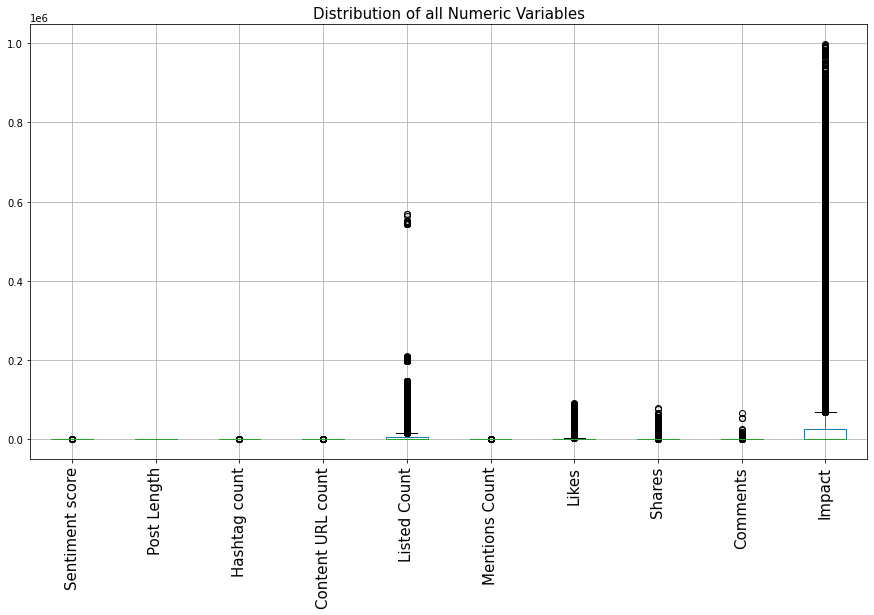

In [14]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_twitter.drop(['Followers count', 'Tweet count'], axis = 1).boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

### We will not remove any outliers because after outliers removal, the rows are decreased drastically

### Check Skewness

In [15]:
df_twitter.skew()

Sentiment score         0.063360
Post Length             0.306660
Hashtag count           3.478724
Content URL count       0.502123
Tweet count            28.431915
Followers count         4.358696
Listed Count            6.216535
Mentions Count          8.382497
Post author verified   -0.522943
Likes                   5.130682
Shares                  8.163343
Comments               84.837571
Impact                  4.697917
dtype: float64

In [16]:
cols = list(df_twitter.columns[2:])
cols.remove('Post author verified')
cols.remove('Content URL count')
cols.remove('Hashtag count')
cols

['Tweet count',
 'Followers count',
 'Listed Count',
 'Media Type',
 'Mentions Count',
 'Likes',
 'Shares',
 'Comments',
 'Impact']

#### We will remove the variables Mentions Count and Comments as the skewness is large

In [17]:
df_twitter.drop(['Mentions Count', 'Comments'], axis = 1, inplace = True)

#### Perform LOG Transformation on the selected columns with skewness > 1

In [18]:
for col in cols:
    try:
        df_twitter[col] = np.log1p(df_twitter[col])
    except:
        pass
    

# Exponential transformation
df_twitter['Hashtag count'] = df_twitter['Hashtag count']**(1/3)

In [19]:
df_twitter.skew()

Sentiment score         0.063360
Post Length             0.306660
Hashtag count           0.919122
Content URL count       0.502123
Tweet count            -0.805445
Followers count        -0.887904
Listed Count           -0.236566
Post author verified   -0.522943
Likes                  -0.035007
Shares                  0.167947
Impact                 -0.328355
dtype: float64

#### Now the skewness looks better than before

In [20]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sentiment score       50000 non-null  float64
 1   Post Length           50000 non-null  float64
 2   Hashtag count         50000 non-null  float64
 3   Content URL count     50000 non-null  float64
 4   Tweet count           50000 non-null  float64
 5   Followers count       50000 non-null  float64
 6   Listed Count          50000 non-null  float64
 7   Media Type            50000 non-null  object 
 8   Post author verified  50000 non-null  object 
 9   Likes                 50000 non-null  float64
 10  Shares                50000 non-null  float64
 11  Impact                50000 non-null  float64
dtypes: float64(10), object(2)
memory usage: 4.6+ MB


#### Separate Target and Independent variables

In [21]:
y = df_twitter['Impact']
X = pd.get_dummies(df_twitter.drop('Impact', axis = 1), drop_first = True)

X.columns

Index(['Sentiment score', 'Post Length', 'Hashtag count', 'Content URL count',
       'Tweet count', 'Followers count', 'Listed Count', 'Likes', 'Shares',
       'Media Type_TEXT', 'Media Type_VIDEO', 'Post author verified_1.0'],
      dtype='object')

#### Check Correlation Matrix

<AxesSubplot:>

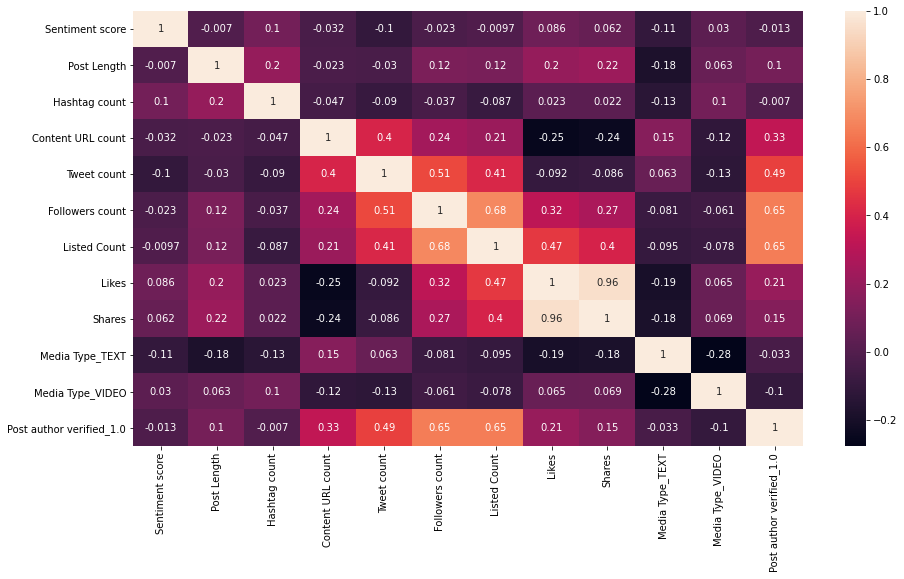

In [22]:
sns.heatmap(X.corr(), annot=True)

#### It can be seen that Shares and Likes are highly correlated with eack other. Thus remove Shares variable

In [23]:
X.drop('Shares', axis = 1, inplace=True)

## Variation Inflation Factor

In [24]:
# filter the numerical features in the dataset
df_numeric_features_vif = X.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Likes,Media Type_TEXT,Media Type_VIDEO,Post author verified_1.0
0,0.000000,17.000000,0.000000,0.000000,7.415175,4.897840,0.000000,0.000000,1,0,0
1,19.300000,84.000000,0.000000,1.000000,12.672711,14.171977,8.604288,2.397895,1,0,1
2,0.000000,78.000000,0.000000,0.000000,10.596060,7.353082,0.000000,0.000000,1,0,0
3,0.000000,284.000000,1.259921,0.000000,8.992930,10.210678,3.295837,6.133398,1,0,1
4,-20.000000,80.000000,0.000000,1.000000,12.259599,7.777374,0.000000,0.000000,0,0,0


#### Calculate the VIF for each numeric variable.

In [25]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# print the dataframe 
vif

,VIF_Factor,Features
0,1.037716,Sentiment score
1,4.878477,Post Length
2,1.588487,Hashtag count
3,2.544990,Content URL count
4,17.211446,Tweet count
5,20.561914,Followers count
6,7.972158,Listed Count
7,4.162292,Likes
8,2.715230,Media Type_TEXT
9,1.145081,Media Type_VIDEO


#### Selecting VIF as 10

In [26]:
for i in range(vif.shape[0]):
    if vif['VIF_Factor'][i] > 10:
        X.drop(vif['Features'][i], axis = 1, inplace = True)

X.columns

Index(['Sentiment score', 'Post Length', 'Hashtag count', 'Content URL count',
       'Listed Count', 'Likes', 'Media Type_TEXT', 'Media Type_VIDEO',
       'Post author verified_1.0'],
      dtype='object')

#### Train - Test Split

In [27]:
# split the independent and target variable into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40000, 9)
y_train (40000,)
X_test (10000, 9)
y_test (10000,)


# Linear Regression

In [28]:
%%time

# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# print the summary output
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Impact   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.260e+05
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:35:35   Log-Likelihood:                -47913.
No. Observations:               40000   AIC:                         9.585e+04
Df Residuals:                   39990   BIC:                         9.593e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

X.drop('Content URL count', axis = 1, inplace = True)

#### Check residual distribution

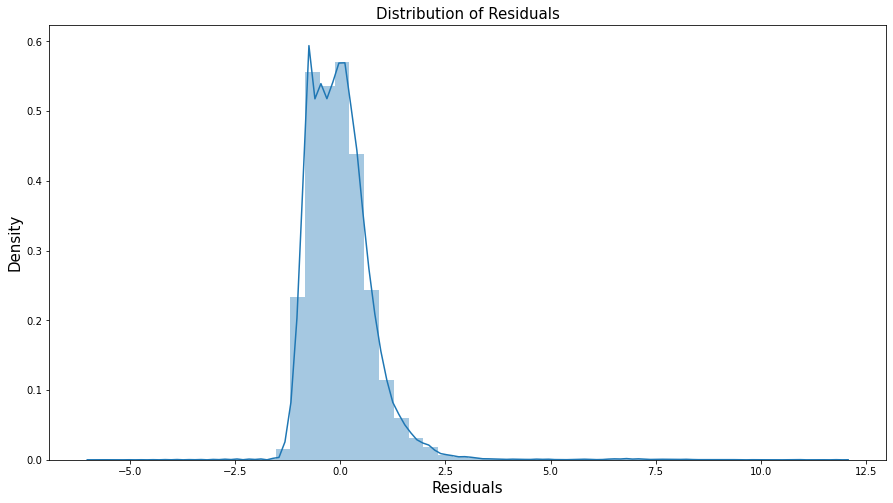

In [29]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a distribution plot
sns.distplot(SLR_model.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# display the plot
plt.show()

#### Create a function for calculating RMSE

In [30]:
def RMSE(model, X, Y):
    y_pred = model.predict(X)
    mse = metrics.mean_squared_error(Y, y_pred)
    rmse = np.sqrt(mse)
    return(round(rmse, 3))

def RMSE(model):
    # Train RMSE
    y_pred = model.predict(X_train)
    mse = metrics.mean_squared_error(y_train, y_pred)
    rmse_train = np.sqrt(mse)
    
    # Test RMSE
    y_pred = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse)
    
    print("Train RMSE: {} \t Test RMSE: {}".format(str(rmse_train), str(rmse_test)))


#### Train RMSE

In [31]:
RMSE(SLR_model, sm.add_constant(X_train), y_train)

0.802

#### Test RMSE

In [32]:
RMSE(SLR_model, sm.add_constant(X_test), y_test)

0.839

### Lets try regularization techniques to take care of overfitting

In [33]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

In [63]:
%%time
ridge = Ridge(alpha = 1, max_iter=500)
ridge.fit(X_train, y_train)

print(RMSE(ridge, X_train, y_train))
print(RMSE(ridge, X_test, y_test))
print(ridge.score(X_train, y_train))

0.802
0.839
0.9659453237958651
Wall time: 14 ms


#### Result is unchanged

# Decision Trees

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(random_state = 0)

In [36]:
%%time
dt_regr.fit(X_train, y_train)

print(RMSE(dt_regr, X_train, y_train))

print(RMSE(dt_regr, X_test, y_test))

0.19
0.735
Wall time: 200 ms


#### There is a lot of overfitting

In [37]:
dt_regr.score(X_train, y_train)

0.9980814318971891

#### Prune the decision tree by working on the max_depth

In [38]:
from tqdm import tqdm

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:03<00:00,  5.67it/s]

Wall time: 3.37 s


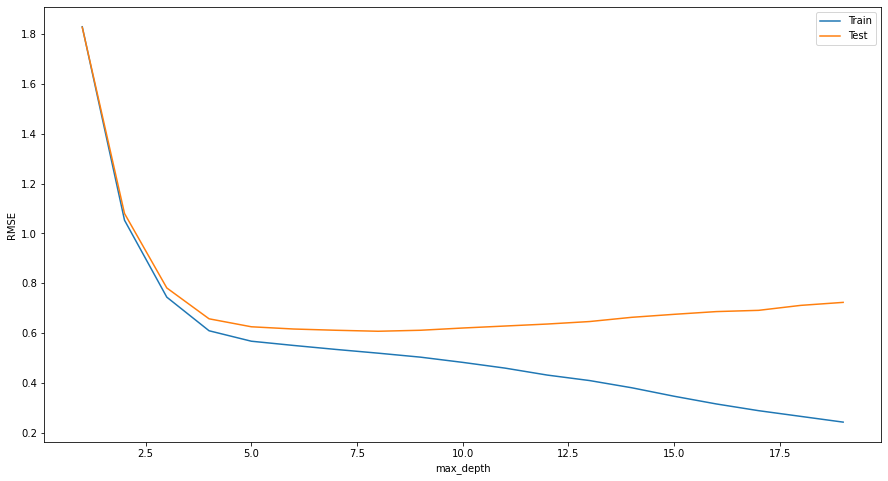

In [39]:
%%time
max_depth = []
rmse_train = []
rmse_test = []
for i in tqdm(range(1,20)):
    dtree = DecisionTreeRegressor(max_depth=i, random_state=0)
    dtree.fit(X_train, y_train)
    rmse = RMSE(dtree, X_train, y_train)
    rmse_train.append(rmse)
    ####
    dtree = DecisionTreeRegressor(max_depth=i, random_state=0)
    dtree.fit(X_train, y_train)
    rmse = RMSE(dtree, X_test, y_test)
    rmse_test.append(rmse)
    ####
    max_depth.append(i)
d = pd.DataFrame({'rmse_train':pd.Series(rmse_train), 
 'rmse_test':pd.Series(rmse_test),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','rmse_train', data=d, label='Train')
plt.plot('max_depth','rmse_test', data=d, label='Test')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend()

#### From the graph above we can see that at maxdepth = 4, the train and test RMSE difference is less (Balanced) as compared to other values 

In [40]:
%%time
dtree = DecisionTreeRegressor(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

Wall time: 41.8 ms


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [41]:
print(RMSE(dtree, X_train, y_train))
print(RMSE(dtree, X_test, y_test))
print(dtree.score(X_train, y_train))

0.609
0.657
0.9803331659811158


#### Plot our pruned tree

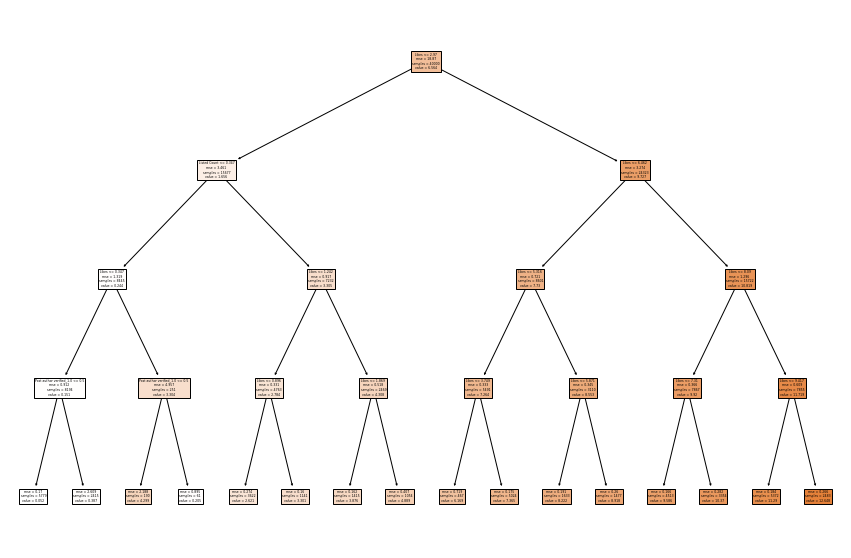

In [68]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dtree, feature_names=X.columns, filled=True)

In [69]:
fig.savefig("decistion_tree.png")

# Random  Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#### Hyper-Parameter tuning of random forest regressor

In [44]:
# Number of trees in random forest
n_estimators = [100, 150, 200, 250, 300]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2,3,4,5,6,7,8,9,10]

# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]

In [45]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [46]:
# create a base random forest regressor model
forest_regressor = RandomForestRegressor()

In [47]:
# Random search of parameters, using 5 fold cross validation
rf_grid = RandomizedSearchCV(estimator = forest_regressor, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               cv = 3, 
                               verbose = 2, 
                               random_state = 0, 
                               n_jobs = -1)


# rf_grid = GridSearchCV(estimator = forest_regressor, 
#                                param_grid = random_grid,
#                                scoring='neg_mean_squared_error', 
#                                cv = 3, 
#                                verbose = 2, 
#                                n_jobs = -1)

In [48]:
%%time
# fit the model
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   17.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.1s finished


Wall time: 38.7 s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [49]:
rf_grid.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 9}

In [50]:
print(RMSE(rf_grid, X_train, y_train))
print(RMSE(rf_grid, X_test, y_test))

0.502
0.585


In [51]:
forest_regressor = RandomForestRegressor(n_estimators= 250,
                     min_samples_split= 2,
                     min_samples_leaf= 4,
                     max_features= 'auto',
                     max_depth= 9)

In [52]:
%%time
forest_regressor.fit(X_train, y_train)

Wall time: 12.8 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
print(RMSE(forest_regressor, X_train, y_train))
print(RMSE(forest_regressor, X_test, y_test))
print(forest_regressor.score(X_train, y_train))

0.502
0.586
0.9866691516998922


# Light Gradient Boosting

In [54]:
import lightgbm as lgb

In [58]:
tuned_paramaters = [{'n_estimators':[150,350,450,650,850],
                     'learning_rate':[0.001,0.01,0.1,0.2,0.3],
                     'num_leaves':[2,3,5,7,9]}]

model_lgb = lgb.LGBMRegressor()
# regrLGB = RandomizedSearchCV(estimator = model_lgb, 
#                                param_distributions = tuned_paramaters,
#                                scoring='neg_mean_squared_error', 
#                                cv = 5, 
#                                verbose = 2, 
#                                random_state = 0, 
#                                n_jobs = -1)


regrLGB = GridSearchCV(estimator = model_lgb, 
                               param_grid = tuned_paramaters,
                               scoring='neg_mean_squared_error', 
                               cv = 3, 
                               verbose = 2, 
                               n_jobs = -1)





In [59]:
%%time
regrLGB.fit(X_train, y_train)

print(RMSE(regrLGB, X_train, y_train))
print(RMSE(regrLGB, X_test, y_test))

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:   53.9s finished


0.477
0.57
Wall time: 55 s


In [60]:
regrLGB.best_params_

{'learning_rate': 0.1, 'n_estimators': 850, 'num_leaves': 9}

In [61]:
%%time
model_lgb = lgb.LGBMRegressor(learning_rate= 0.1, n_estimators= 850, num_leaves= 9)
model_lgb.fit(X_train, y_train)

Wall time: 710 ms


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=850, n_jobs=-1, num_leaves=9, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [62]:
print(RMSE(model_lgb, X_train, y_train))
print(RMSE(model_lgb, X_test, y_test))
print(model_lgb.score(X_train, y_train))

0.477
0.57
0.9879194320248433
